# Regularization analysis

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch as t
%matplotlib inline

In [16]:
ROOT = "/Users/jonathanlu/Documents/data_sym/SG"
losses = np.load(f"{ROOT}/losses.npy")
sym_labels = np.load(f"{ROOT}/labels.npy")
NUM_N0, NEPOCH = sym_labels.shape[:-1]
scores = np.zeros(NUM_N0)
N0s = np.linspace(0, 5e3, NUM_N0+1)[1:]

In [19]:
# Compute the score function
for pj, label in enumerate(sym_labels):
    score = 0
    for m1, m2 in label:
        if (m1 in [1,3] and m2 in [2,4]) or (m2 in [1,3] and m1 in [2,4]):
            score += 1
    scores[pj] = score / NEPOCH
sym_labels

array([[[5., 3.],
        [5., 5.],
        [5., 3.],
        ...,
        [5., 3.],
        [5., 1.],
        [3., 2.]],

       [[2., 3.],
        [2., 3.],
        [2., 1.],
        ...,
        [3., 2.],
        [5., 1.],
        [5., 1.]],

       [[2., 2.],
        [2., 1.],
        [1., 2.],
        ...,
        [1., 1.],
        [1., 2.],
        [2., 2.]],

       ...,

       [[2., 2.],
        [1., 2.],
        [2., 1.],
        ...,
        [2., 2.],
        [2., 1.],
        [1., 1.]],

       [[1., 1.],
        [3., 1.],
        [1., 1.],
        ...,
        [2., 2.],
        [2., 2.],
        [1., 2.]],

       [[2., 1.],
        [2., 2.],
        [2., 2.],
        ...,
        [1., 2.],
        [2., 2.],
        [1., 2.]]])

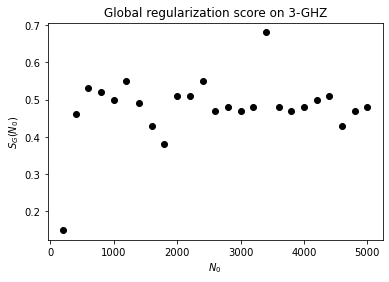

In [20]:
plt.title("Global regularization score on 3-GHZ")
plt.xlabel(r"$N_0$")
plt.ylabel(r"$S_G(N_0)$")
plt.scatter(N0s, scores, c='k')